In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
path = r'./datasets/prefinal.csv'

In [3]:
df = pd.read_csv(path)
df = df.drop(columns=df.columns[0])
df = df[['timestamp','value','code']]
df.head()

,timestamp,value,code
0,575452800.0,134.0,Pre-breakfast blood glucose measurement
1,575452800.0,20.0,NPH insulin dose
2,575467200.0,158.0,Pre-lunch blood glucose measurement
3,575488800.0,258.0,Pre-supper blood glucose measurement
4,575539200.0,20.0,NPH insulin dose


In [4]:
df.dtypes

timestamp    float64
value        float64
code          object
dtype: object

In [5]:
df1 = pd.get_dummies(df)
df1.head()

,timestamp,value,code_Hypoglycemic symptoms,code_Less-than-usual exercise activity,code_Less-than-usual meal ingestion,code_More-than-usual exercise activity,code_More-than-usual meal ingestion,code_NPH insulin dose,code_Post-breakfast blood glucose measurement,code_Post-lunch blood glucose measurement,...,code_Pre-breakfast blood glucose measurement,code_Pre-lunch blood glucose measurement,code_Pre-snack blood glucose measurement,code_Pre-supper blood glucose measurement,code_Regular insulin dose,code_Typical exercise activity,code_Typical meal ingestion,code_UltraLente insulin dose,code_Unspecified blood glucose measurement,code_Unspecified special event
0,575452800.0,134.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,575452800.0,20.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,575467200.0,158.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,575488800.0,258.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,575539200.0,20.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
pipe1 = Pipeline([('scaler',StandardScaler(with_mean=False)),('pca',PCA(n_components=3,random_state=1))])
df1_pipe1 = pipe1.fit_transform(df1)
df1_pipe1

array([[ 1.67110209,  0.49452505,  0.50229444],
       [-0.41674304, -1.39065018, -0.96771535],
       [ 1.54383687, -0.05768336, -2.2063812 ],
       ...,
       [-1.62707291,  0.74061765,  0.672942  ],
       [ 2.0764404 ,  1.19810182, -0.14881418],
       [-1.70297232,  0.72763608,  0.66515647]])

<IPython.core.display.Javascript object>


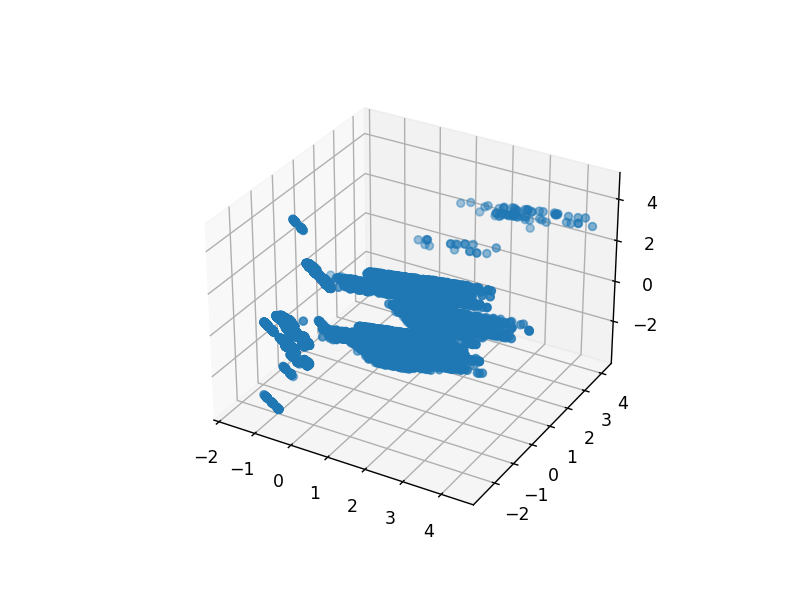

In [7]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df1_pipe1[:,0],df1_pipe1[:,1],df1_pipe1[:,2])

In [10]:
kmeans = KMeans(n_clusters=2,max_iter=1000,random_state=123).fit(df1_pipe1)
Class=kmeans.labels_
Class

array([0, 1, 0, ..., 1, 0, 1])

<IPython.core.display.Javascript object>


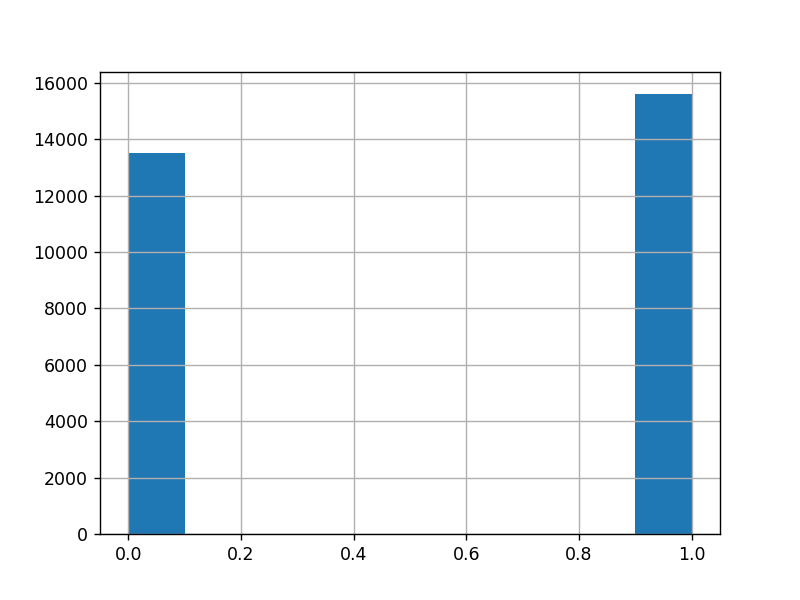

<AxesSubplot:>

In [11]:
pd.Series(Class).hist()

In [12]:
df['Class'] = Class
df.head()

,timestamp,value,code,Class
0,575452800.0,134.0,Pre-breakfast blood glucose measurement,0
1,575452800.0,20.0,NPH insulin dose,1
2,575467200.0,158.0,Pre-lunch blood glucose measurement,0
3,575488800.0,258.0,Pre-supper blood glucose measurement,0
4,575539200.0,20.0,NPH insulin dose,1


In [14]:
df.to_csv(r'./datasets/uci-diabetes.csv')